In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('movieReplicationSet.csv')

# Sensation Seeking Characteristic

In [29]:
sensation_seeking = data.iloc[:,400:420].dropna(axis=0)
sensation_seeking_labels = sensation_seeking.columns
sensation_seeking_values = sensation_seeking.values
ssi = sensation_seeking.index
sensation_seeking

,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,"I enjoy being in large, loud crowds like the Times Square Ball Drop on New Years Eve",I enjoy going to large music or dance festivals,I enjoy watching horror movies,"No risk, No fun","I like to be surprised, even if it startles or scares me",Have you ever parachuted?,I enjoy haunted houses,I had a sheltered upbringing,My life is very stressful,I value my life to be well ordered and predictable,Have you ridden a motorcycle?,Have you gambled or bet for money?,Have you ever been sky-diving?
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,3.0,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,4.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,1.0
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,2.0,1.0,2.0
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,3.0,1.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,3.0,3.0,2.0,1.0,4.0,4.0,4.0,1.0,1.0,2.0
1093,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,4.0,5.0,2.0,1.0,5.0,4.0,5.0,3.0,1.0,2.0
1094,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,3.0,2.0
1095,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,4.0,4.0,3.0,1.0,4.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

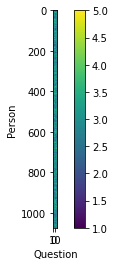

In [30]:
plt.imshow(sensation_seeking)
plt.xlabel('Question')
plt.ylabel('Person')
plt.colorbar()
plt.show

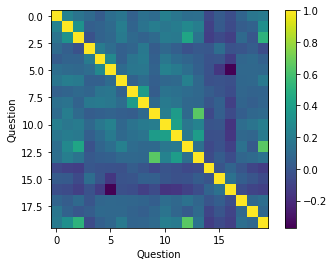

In [31]:
corr_matrix = sensation_seeking.corr()

plt.imshow(corr_matrix)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

In [1]:
z_scored = stats.zscore(sensation_seeking)
pca = PCA().fit(z_scored)

eig_vals = pca.explained_variance_ # Eigenvalues of the vectors themselves, representative of the scalars multiplied by the orthonormal basis vectors
loadings = pca.components_ # Principal axes in feature space (how much each PC is affected by each feature), dimensions representing maximum variance of the data.
# Loadings is effectively in which direction the eigenvectors points in terms of the original variables
rotated_data = pca.fit_transform(z_scored) # Stored data rotated, scaled, and rotated again. Use this for training/fitting the actual data

covar_explained = eig_vals / sum(eig_vals) * 100

for entry in covar_explained:
    print(entry.round(3))

NameError: name 'stats' is not defined

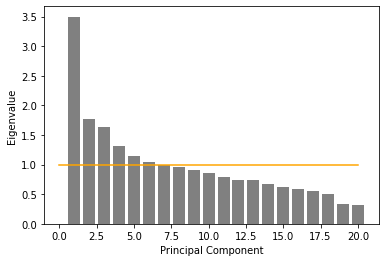

In [33]:
num_quest = len(sensation_seeking.columns)
x = np.linspace(1,num_quest, num_quest)
plt.bar(x, eig_vals, color='gray')
plt.plot([0,num_quest], [1,1], color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [34]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eig_vals > threshold))

print('Number of factors selected by elbow criterion: 1')

threshold = 90
eig_sum = np.cumsum(covar_explained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eig_sum < threshold) + 1)

Number of factors selected by Kaiser criterion: 6
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 16


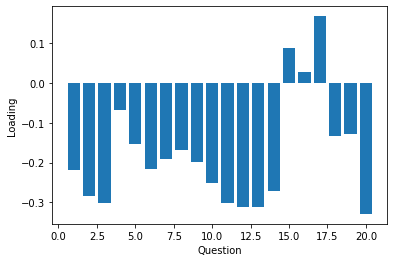

Principal component 1: I enjoy driving fast
Principal component 2: I enjoy rollercoasters 
Principal component 3: Have you ever bungee-jumped?
Principal component 4: I enjoy impulse shopping
Principal component 5: I sometimes go out on weeknights even if I have work to do
Principal component 6: I enjoy doing things without too much planning 
Principal component 7: Have you ever been rock climbing?
Principal component 8: I enjoy being in large, loud crowds like the Times Square Ball Drop on New Years Eve
Principal component 9: I enjoy going to large music or dance festivals 
Principal component 10: I enjoy watching horror movies
Principal component 11: No risk, No fun
Principal component 12: I like to be surprised, even if it startles or scares me
Principal component 13: Have you ever parachuted?
Principal component 14: I enjoy haunted houses
Principal component 15: I had a sheltered upbringing
Principal component 16: My life is very stressful
Principal component 17: I value my life to 

In [35]:
PC = 0 # Which PC to take a look at
plt.bar(x, loadings[PC,:] * -1)
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show()
for index in range(len(sensation_seeking_labels)):
    print(f'Principal component {index+1}: {sensation_seeking_labels[index]}')

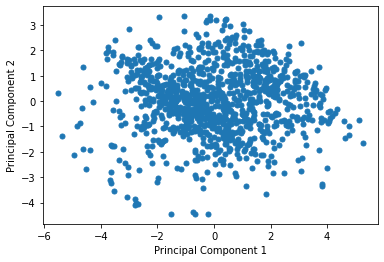

In [36]:
plt.plot(rotated_data[:,0] * -1, rotated_data[:,1] * -1,'o',markersize=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Personality Characteristic

In [11]:
personality = data.iloc[:,420:464].dropna(axis=0)
personality_labels = personality.columns
personality_values = personality.values
personality.shape

(1000, 44)

<function matplotlib.pyplot.show(close=None, block=None)>

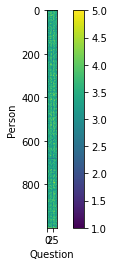

In [12]:
plt.imshow(personality)
plt.xlabel('Question')
plt.ylabel('Person')
plt.colorbar()
plt.show

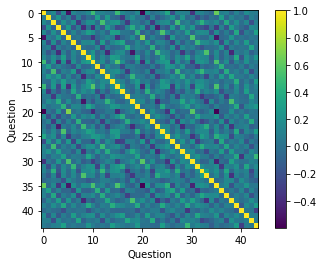

In [13]:
corr_matrix = personality.corr()

plt.imshow(corr_matrix)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

In [14]:
z_scored = stats.zscore(personality)

pca = PCA().fit(z_scored)
eig_vals = pca.explained_variance_
loadings = pca.components_
rotated_data = pca.fit_transform(z_scored)

covar_explained = eig_vals / sum(eig_vals) * 100

for entry in covar_explained:
    print(entry.round(3))

15.066
9.034
8.056
7.381
5.646
4.648
2.447
2.318
2.086
2.025
1.99
1.89
1.82
1.778
1.706
1.659
1.594
1.554
1.505
1.455
1.412
1.394
1.336
1.268
1.252
1.217
1.175
1.161
1.09
1.079
1.051
1.032
1.006
0.988
0.94
0.93
0.908
0.846
0.818
0.804
0.75
0.717
0.639
0.529


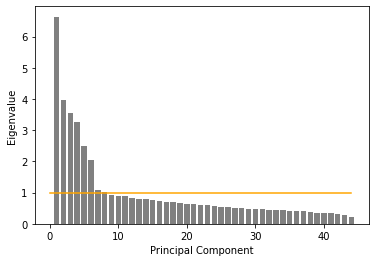

In [15]:
num_quest = len(personality.columns)
x = np.linspace(1,num_quest, num_quest)
plt.bar(x, eig_vals, color='gray')
plt.plot([0,num_quest], [1,1], color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [16]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eig_vals > threshold))

print('Number of factors selected by elbow criterion: 1')

threshold = 90
eig_sum = np.cumsum(covar_explained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eig_sum < threshold) + 1)

Number of factors selected by Kaiser criterion: 8
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 32


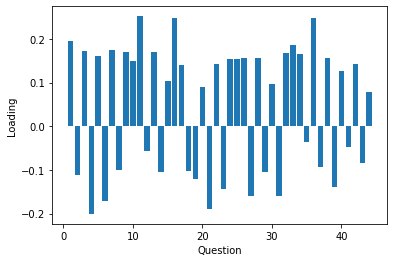

Principal component 1: Is talkative
Principal component 2: Tends to find fault with others
Principal component 3: Does a thorough job
Principal component 4: Is depressed, Blue
Principal component 5: Is original, comes up with new ideas
Principal component 6: Is reserved
Principal component 7: Is helpful and unselfish with others
Principal component 8: Can be somewhat careless
Principal component 9: Is relaxed, handles stress well
Principal component 10: Is curious about many different things
Principal component 11: Is full of energy
Principal component 12: Starts quarrels with others
Principal component 13: Is a reliable worker
Principal component 14: Can be tense
Principal component 15: Is ingenious, a deep thinker
Principal component 16: Generates a lot of Enthusiasm
Principal component 17: Has a forgiving nature
Principal component 18: Tends to be disorganized
Principal component 19: Worries a lot
Principal component 20: Has an active imagination
Principal component 21: Tends to be 

In [17]:
PC = 0 # Which PC to take a look at
plt.bar(x, loadings[PC,:] * -1)
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show()
for index in range(len(personality_labels)):
    print(f'Principal component {index+1}: {personality_labels[index]}')

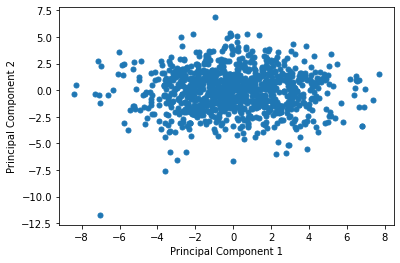

In [18]:
plt.plot(rotated_data[:,0] * -1, rotated_data[:,1] * -1,'o',markersize=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Logistic Regression Portion with PCA | PCA Portion

In [37]:
saw = pd.DataFrame(data['Saw (2004)']) # Create a new dataframe
dropIndex = saw.drop(index=ssi).index # Gets indices of differences
saw = saw.drop(dropIndex) # Drops indexes from saw

In [38]:
combined = pd.concat([saw, sensation_seeking], axis=1).reset_index().drop(['index'], axis=1)
combinedIndex = combined.index

In [39]:
combined.loc[(combined['Saw (2004)'] < 2.5), 'Saw (2004)'] = 0 # Order for this matters
combined.loc[(combined['Saw (2004)'] > 2.5), 'Saw (2004)'] = 1

combined = combined.where(combined['Saw (2004)'] != 2.5).dropna()
combIndex = combined.index

sawFinal = combined[['Saw (2004)']]
charFinal = combined.drop('Saw (2004)', axis=1)

# Logistic Regression Portion with PCA | Regression Portion

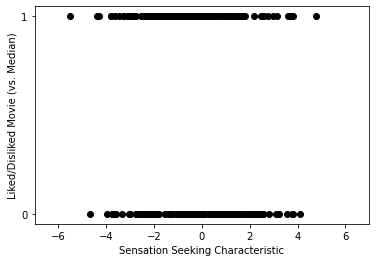

In [41]:
X = (rotated_data[combIndex,0] * -1).flatten()
y = sawFinal

# Plot data:
import matplotlib.pyplot as plt
plt.scatter(X, y,color='black')
plt.xlabel('Sensation Seeking Characteristic')
plt.xlim([-7,7])
plt.ylabel('Liked/Disliked Movie (vs. Median)')
plt.yticks(np.array([0,1]))
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

# Format data:
X = (rotated_data[combIndex,0] * -1).reshape(-1, 1)
y = np.array(sawFinal).reshape(-1,1)

model = LogisticRegression().fit(X,y)

C:\Users\sunny\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


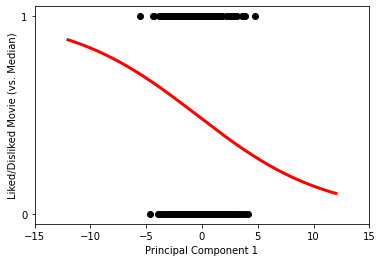

In [43]:
# Plot the data

# Init data:
from scipy.special import expit # this is the logistic sigmoid function
x1 = np.linspace(-12, 12, 500)
y1 = x1 * model.coef_ + model.intercept_
sigmoid = expit(y1)

# Plot:
plt.plot(x1,sigmoid.ravel(),color='red',linewidth=3) # the ravel function returns a flattened array
plt.scatter(X, y,color='black')
plt.hlines(0.5,260,345,colors='gray',linestyles='dotted')
plt.xlabel('Principal Component 1')
plt.xlim([-15,15])
plt.ylabel('Liked/Disliked Movie (vs. Median)')
plt.yticks(np.array([0,1]))
plt.show()

In [44]:
model.coef_

array([[-0.17323103]])

In [45]:
import statsmodels.api as sm

model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  305
Model:                            GLM   Df Residuals:                      303
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -207.52
Date:                Fri, 10 Dec 2021   Deviance:                       415.04
Time:                        09:19:17   Pearson chi2:                     305.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02518
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0788      0.119     -0.662      0.508      -0.312       0.155
x1            -0.1739      0.063     -2.742      0.006      -0.298      -0.050
==============================================================================
"""

In [47]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.681112
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  305
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            0
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.01736
Time:                        09:19:18   Log-Likelihood:                -207.74
converged:                       True   LL-Null:                       -211.41
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1647      0.062     -2.668      0.008      -0.286      -0.044
==============================================================================
"""

# Appendix

In [ ]:
saw_ss_comb = pd.DataFrame(data[['Saw (2004)'] + data.iloc[:,400:420].columns.tolist()].dropna(axis=0)).reset_index().drop('index', axis=1) # Creates a concatenated dataframe with Saw (2001) and the Sensation Seeking values

print(saw_ss_comb)

saw_ss_arr = np.array(saw_ss_comb['Saw (2004)'])
data_ss_drop = saw_ss_comb.drop(columns=['Saw (2004)'])

print(data_ss_drop)

median = float(np.median(saw_ss_arr))
saw_ss_arr[np.where(saw_ss_arr<2.5)] = 0
saw_ss_arr[np.where(saw_ss_arr>2.5)] = 1
saw_ss_pred = pd.DataFrame(saw_ss_arr, columns=['Saw (2004)'])

print(saw_ss_pred)

remove = np.where(saw_ss_arr==median)[0]

remove

In [ ]:
saw_ss_final = pd.concat([saw_ss_pred, data_ss_drop], axis=1)

print(saw_ss_final.describe())

out_index = saw_ss_final[(saw_ss_final['Saw (2004)']==2.5)].index

saw_ss_final.drop(out_index, inplace=True)

print(saw_ss_final.describe())

saw_ss_final.reset_index().drop('index', axis=1)

print(saw_ss_final.index)

predictors = saw_ss_final[['Saw (2004)']]

saw_sensation_seeking = saw_ss_final.drop('Saw (2004)', axis=1)
saw_sensation_seeking_labels = saw_sensation_seeking.columns

saw_sensation_seeking